#**01. K-평균 알고리즘 이해**

## K-평균을 이용한 붓꽃 데이터 세트 군집화

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
# 붓꽃 데이터 세트를 3개 그룹으로 군집화

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [3]:
# labels_ 속성값 확인

print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


각 레코드가 첫번째 군집, 두번째 군집, 세번째 군집에 속함을 의미

In [4]:
# target과 cluster 값 개수 비교

irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [5]:
# 붓꽃 데이터 세트의 군집화를 시각화
# 속성이 4개이므로 2차원 평면에 적합치 않아 PCA를 이용해 4개의 속성을 2개로 차원 축소하여 X좌표, Y좌표로 개별 데이터 표현

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


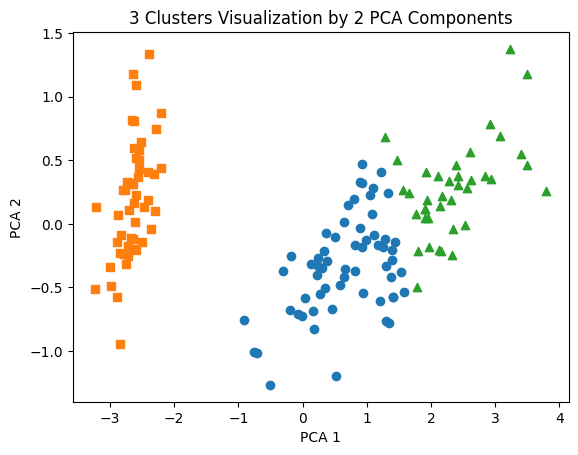

In [6]:
# 마커별로 별도의 산점도 수행

# cluster 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

## 군집화 알고리즘 테스트를 위한 데이터 생성

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

# 테스트 데이터 생성
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [8]:
# DataFrame에 적용

import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

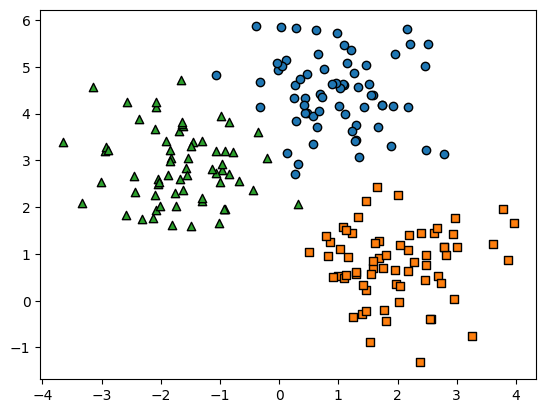

In [9]:
# 피처 데이터 세트가 어떠한 군집화 분포를 가지고 만들어졌는지 확인

target_list = np.unique(y)

# 각 target별 scatter plot 의 marker 값
markers=['o', 's', '^', 'P','D','H','x']

# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )

plt.show()

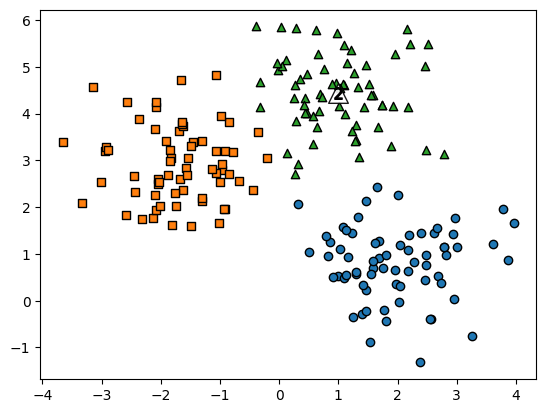

In [10]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200,random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers= kmeans.cluster_centers_
unique_labels= np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label']==label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )

# 군집별 중심 위치 좌표 시각화
plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
            alpha=0.9, edgecolor='k', marker=markers[label])
plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
            marker='$%d$' % label)
plt.show()

In [11]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


cluster_std가 작을수록 군집 중심에 데이터가 모여 있으며, 클수록 데이터가 퍼져 있음

# **02. 군집 평가(Cluster Evalution)**

##붓꽃 데이터 세트를 이용한 군집 평가

In [12]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score= silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [13]:
# 군집 칼럼별로 group by하여 silhouette_coeff 칼럼의 평균값을 구함

irisDF.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


##군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

In [14]:
def visualize_silhouette_sklearn(range_n_clusters, X):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title('Number of Cluster : '+ str(n_clusters)+'\n' \
                              'Silhouette Score :' + str(round(silhouette_avg,3)))
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

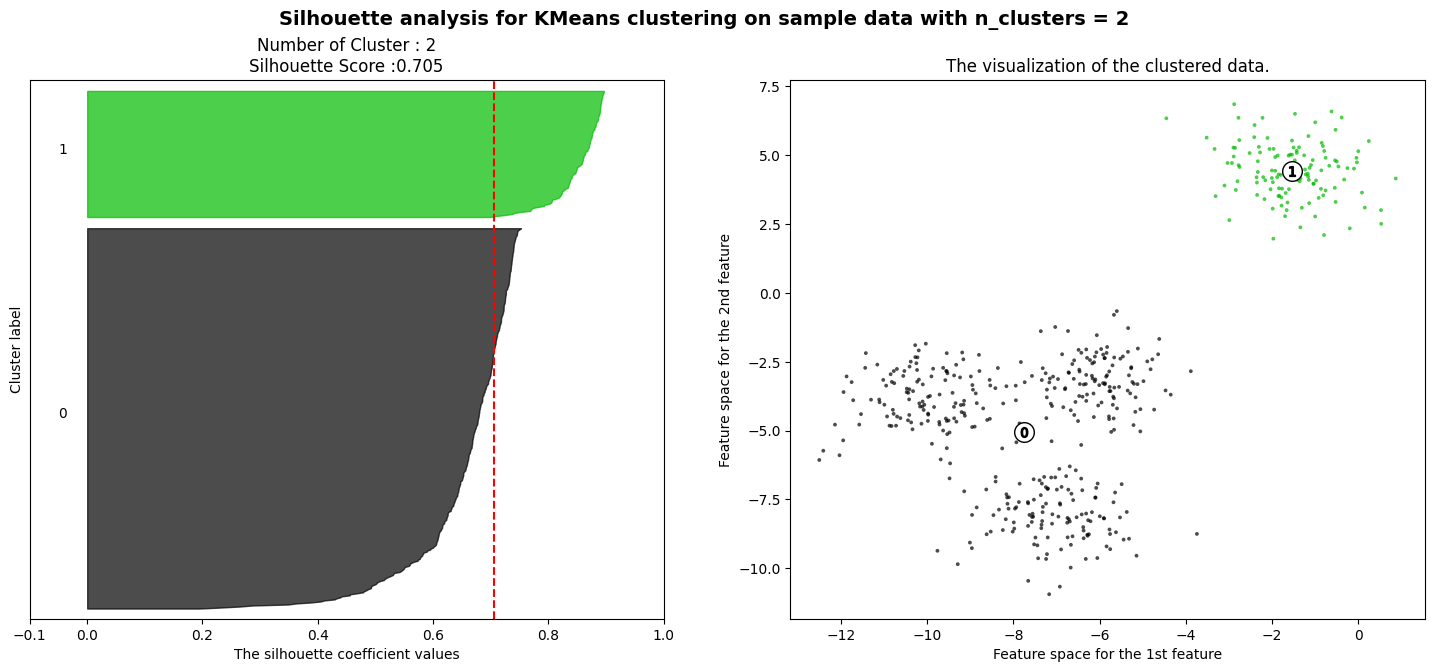

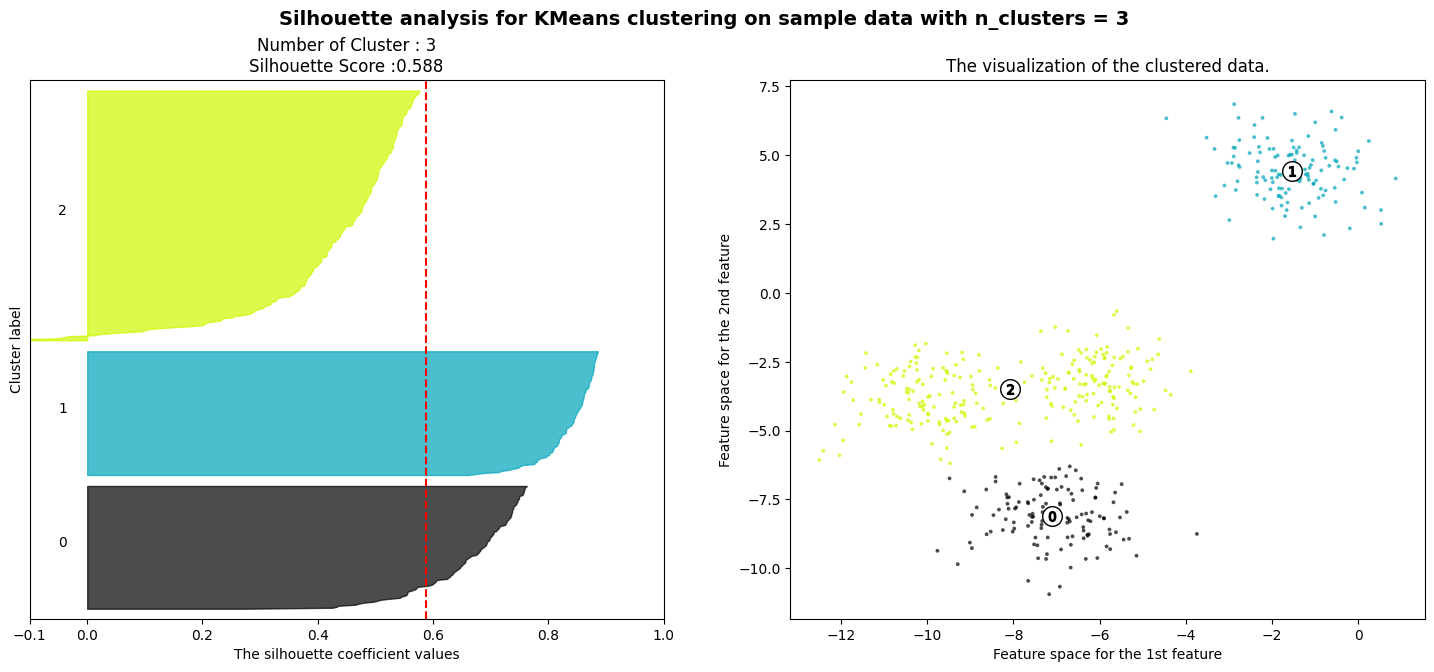

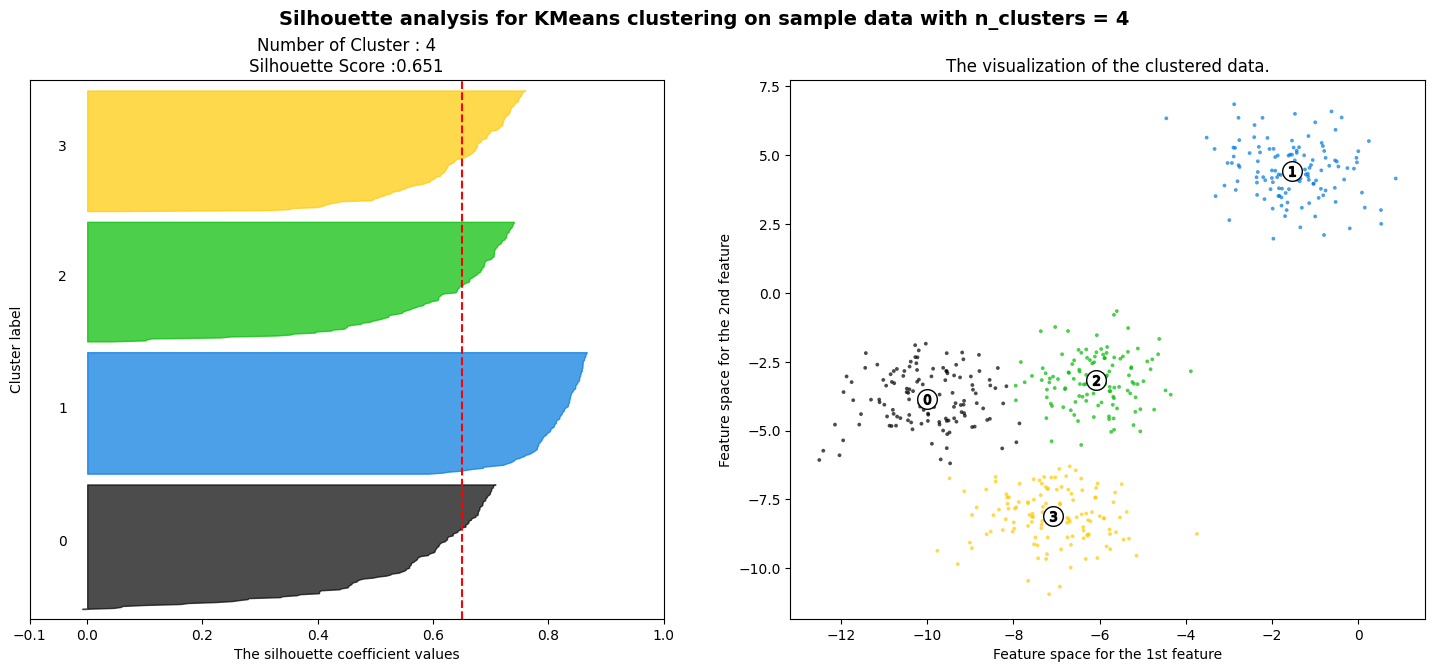

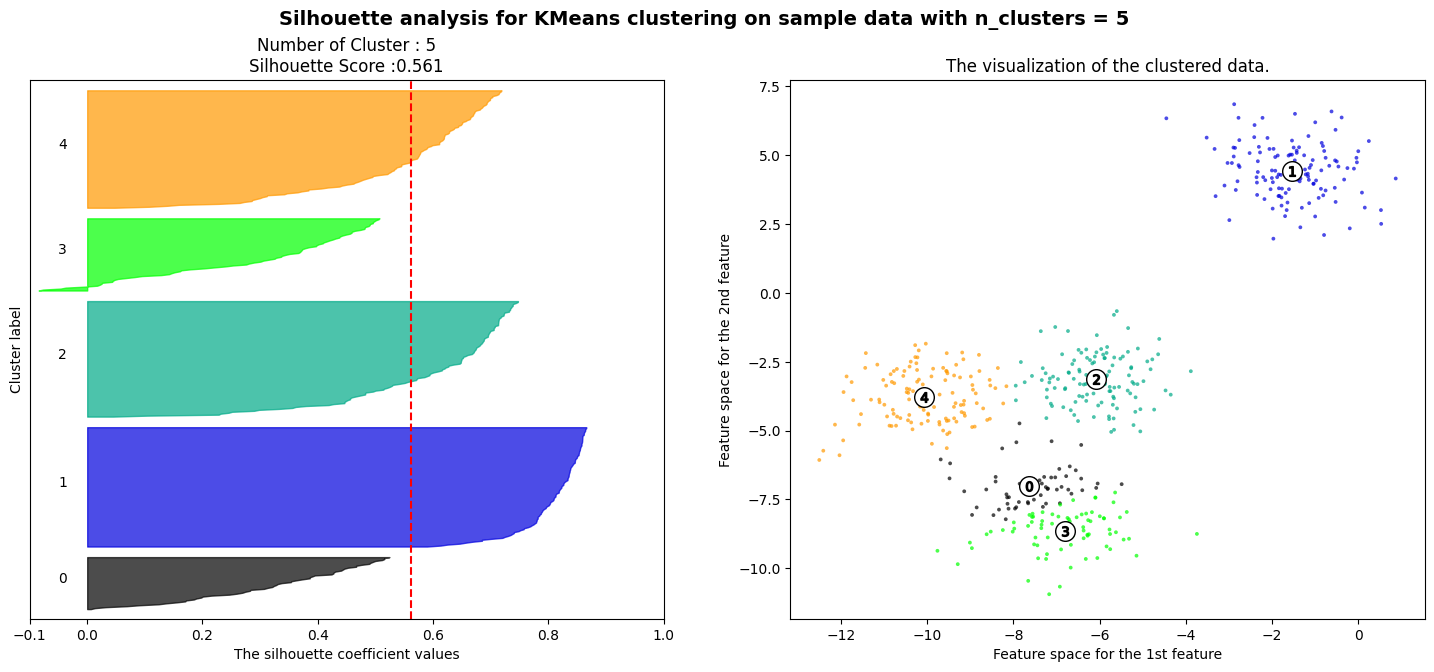

In [15]:
# 군집화를 위한 4개의 군집 중심의 500개 2차원 데이트 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette_sklearn([2,3,4,5],X)

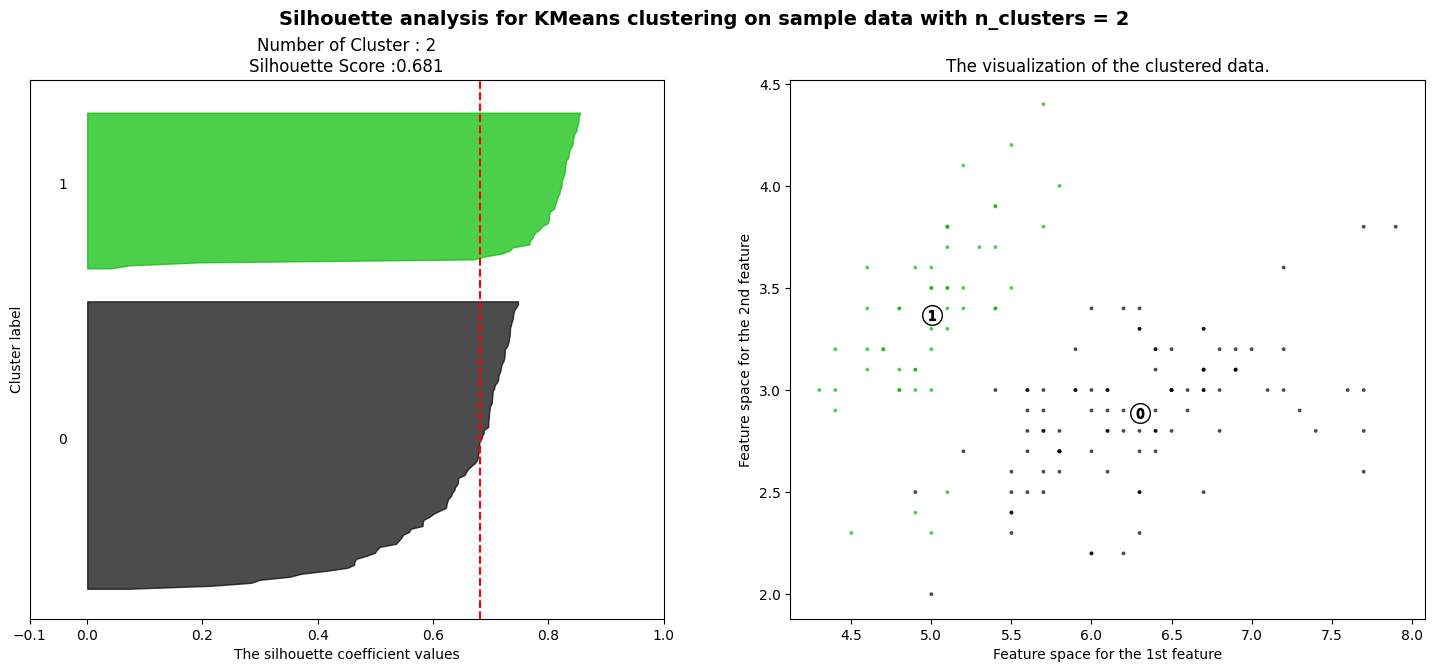

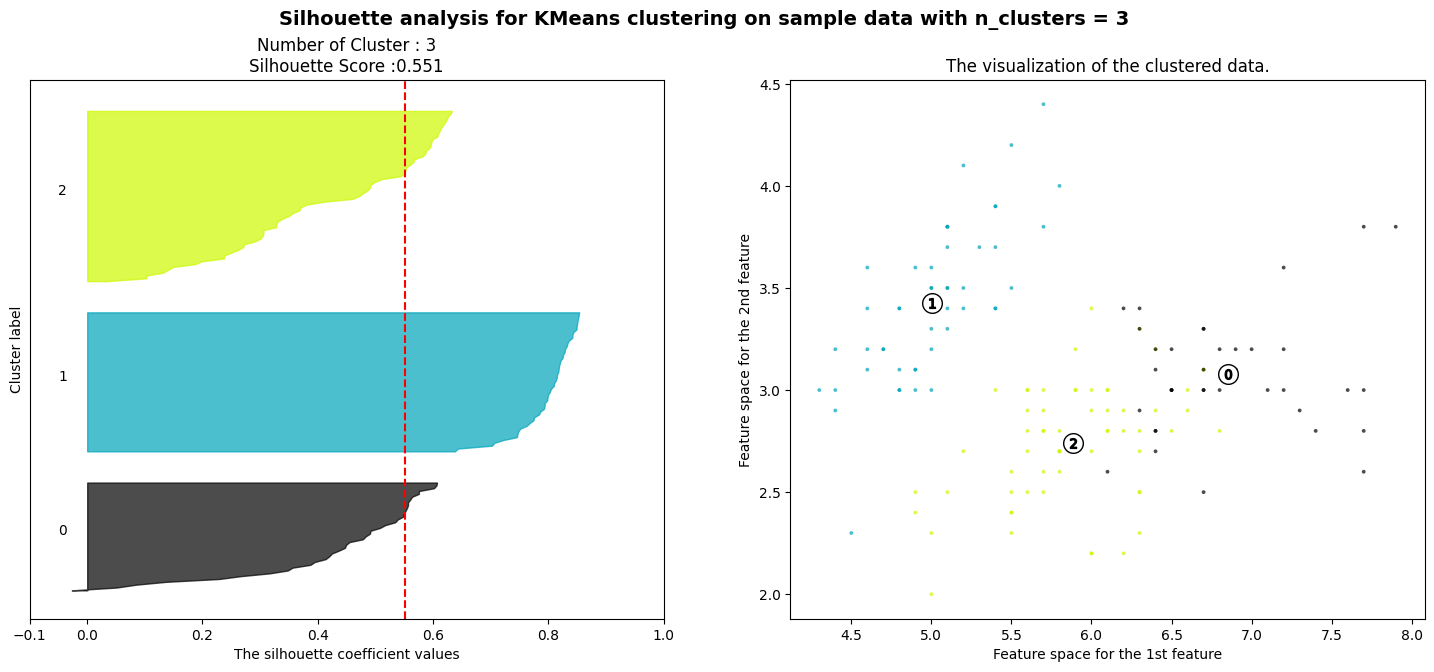

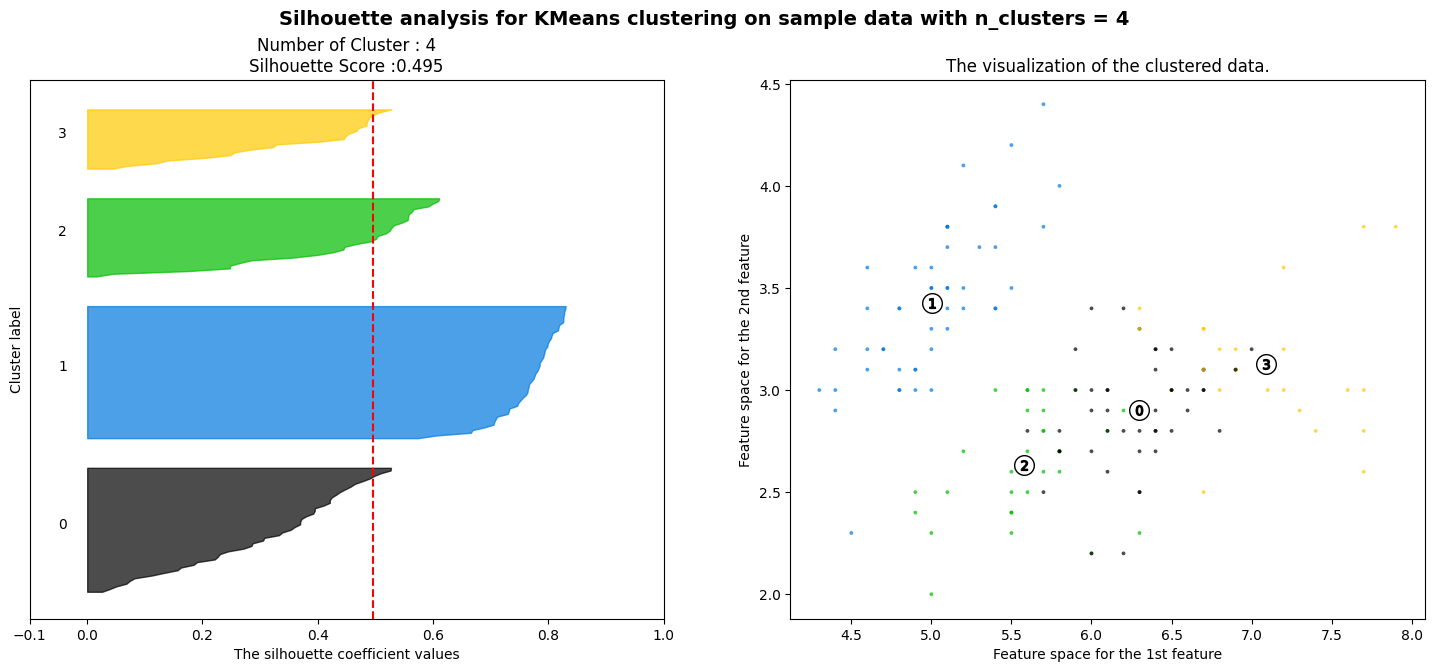

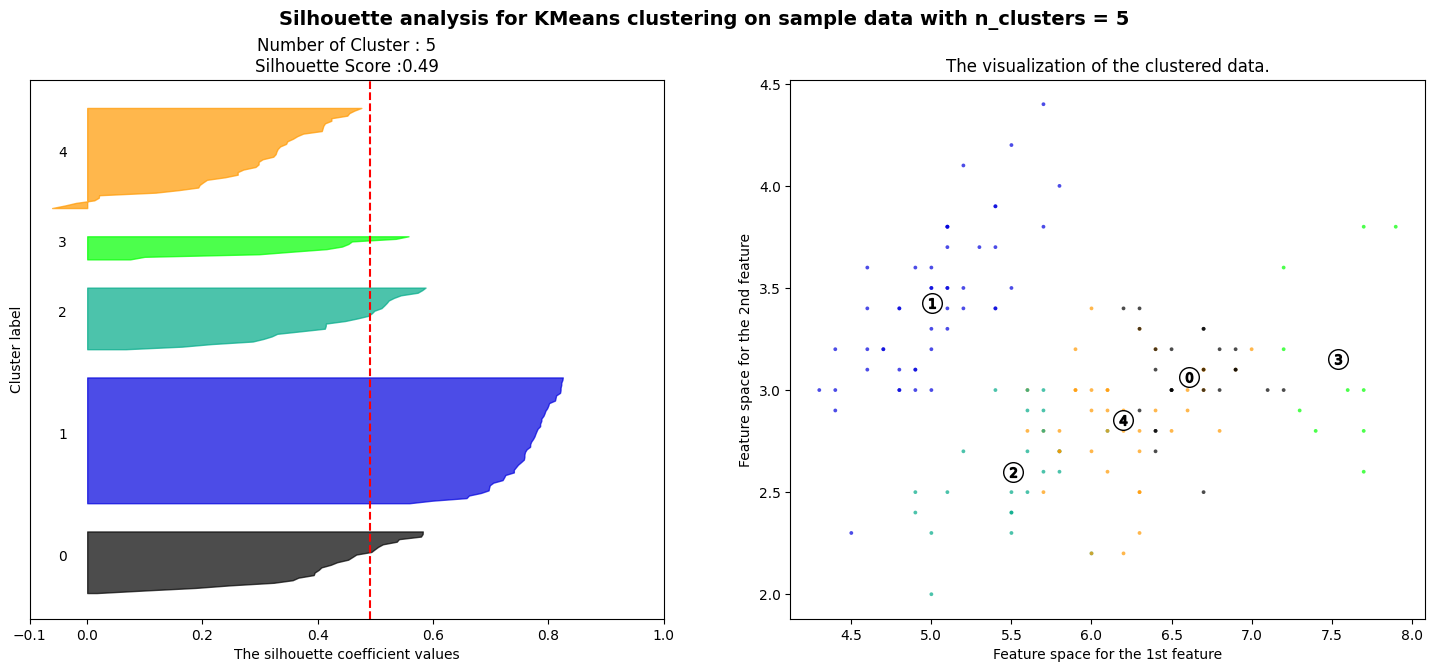

In [16]:
# 붓꽃 데이터를 이용해 알아보기
from sklearn.datasets import load_iris
iris= load_iris()
visualize_silhouette_sklearn([2,3,4,5],iris.data)

# **03. 평균 이동**

##평균 이동 (Mean Shift)의 개요

In [17]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [18]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [19]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [20]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


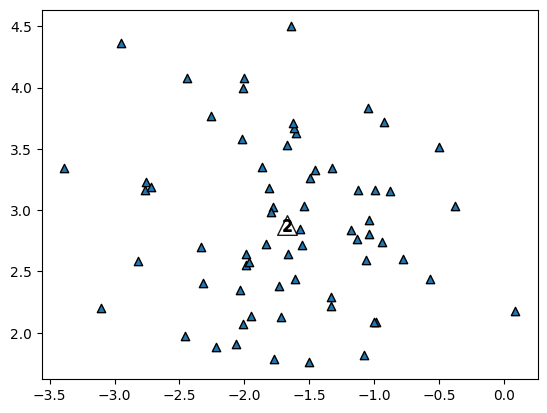

In [21]:
import matplotlib.pyplot as plt # Corrected the typo from 'matplotliv' to 'matplotlib'
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels_ = np.unique(cluster_labels)
markers= ['o', 's', '^', 'x', '*']

for label in unique_labels_:
  label_cluster = clusterDF[clusterDF['meanshift_label']==label]
  center_x_y= centers[label]

# 군집별로 다른 마커로 산점도 적용
plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )


# 군집별 중심 표현
plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
plt.show()

# **04. GMM(Gaussian Mixture Model)**

##GMM을 이용한 붓꽃 데이터 세트 군집화

In [22]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 좀 더 편리한 데이터 핸들링을 위해 데이터프레임으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target']= iris.target


In [23]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인.
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


In [24]:
kmeas= KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeas_cluster_labels= kmeans.predict(iris.data)

irisDF['kmeans_cluster'] = kmeas_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


붓꽃 데이터 세트가 GMM 군집화에 더 효과적임

## GMM과 K-평균의 비교

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    """
    Visualizes cluster plot.

    Args:
        clusterobj: Cluster object (e.g., KMeans, MeanShift).
        dataframe: DataFrame containing the features and target/cluster labels.
        label_name: Name of the column containing the target/cluster labels.
        iscenter: If True, plot cluster centers.

    Returns:
        None
    """

    if iscenter:
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers = ['o', 's', '^', 'x', '*']
    isNoise = False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name] == label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise = True
        else:
            cluster_legend = 'Cluster ' + str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            if label != -1:
                plt.scatter(x=centers[label, 0], y=centers[label, 1], s=250,
                            color='white', alpha=0.9, edgecolor='k', marker=markers[label])
                plt.scatter(x=centers[label, 0], y=centers[label, 1], s=70,
                            color='k', edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc = 'upper center'
    else:
        legend_loc = 'upper right'

    plt.legend(loc=legend_loc)
    plt.show()

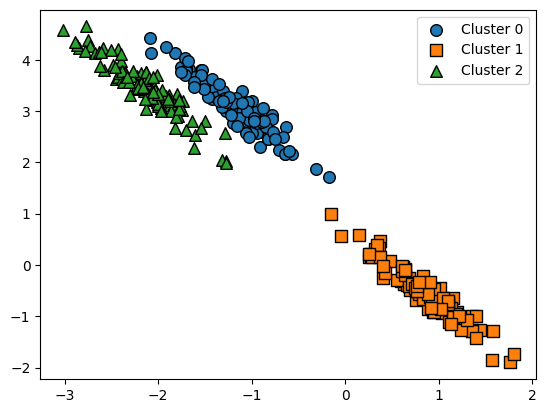

In [27]:
from sklearn.datasets import make_blobs

X,y= make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

transformation= [[0.60834549, -0.63667341],[-0.40887718, 0.85250621]]
X_aniso = np.dot(X, transformation)

clusterDF= pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

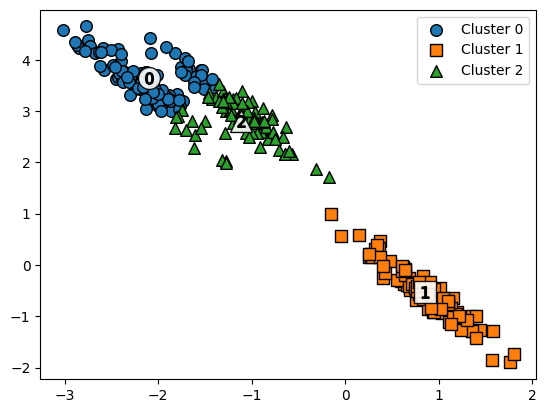

In [30]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans= KMeans(3, random_state=0)
kmeans_label= kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']= kmeans_label

# Change 'iscluster=True' to 'iscenter=True'
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

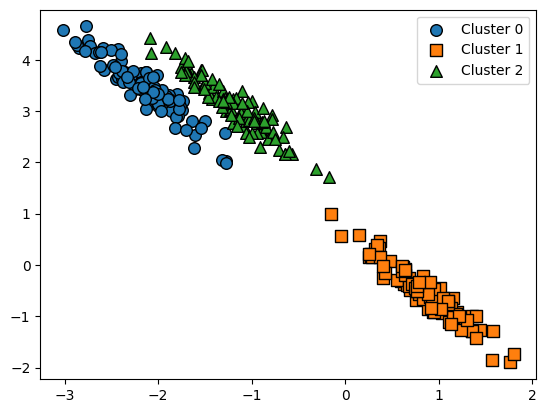

In [31]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm= GaussianMixture(n_components=3, random_state=0)
gmm_label= gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label']= gmm_label

# GaussianMixture는 cluster_centers_속성이 없으므로 iscenter를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

In [32]:
# make_blobs()의 target값과 KMeans, GMM의 군집 Label값을 비교: 군집화 효율 차이 확인

print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64


#**05. DBSCAN**

##DBSCAN 적용하기 - 붓꽃 데이터 세트

In [33]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


- 군집 레이블이 -1: 노이즈에 속하는 군집 의미
- 군집이 2개가 된 것이 군집화 효율이 떨어진다는 의미는 아님
<br>
DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정하므로 DBSCAN에서 군집의 개수를 지정하는 것은 무의미

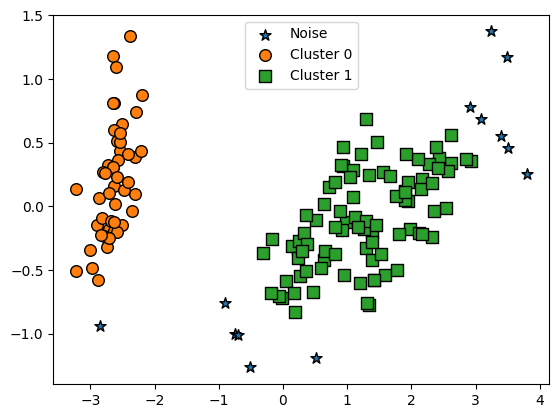

In [34]:
# DBSCAN으로 군집화 데이터 세트를 2차원 평면에서 표현(2개의 피처로 압축 변환한 뒤, visualize_cluster_plot()함수 이용)

from sklearn.decomposition import PCA

# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca=PCA(n_components=2, random_state=0)
pca_transformed= pca.fit_transform(iris.data)

# visualize_cluster_2d()함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


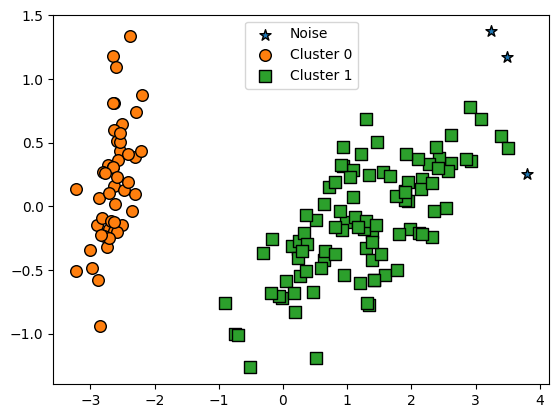

In [36]:
# eps를 기존의 0.6에서 0.8로 증가시키면 노이즈 데이터 수가 줄어드는 것을 확인

from sklearn.cluster import DBSCAN

dbscan= DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target']= iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


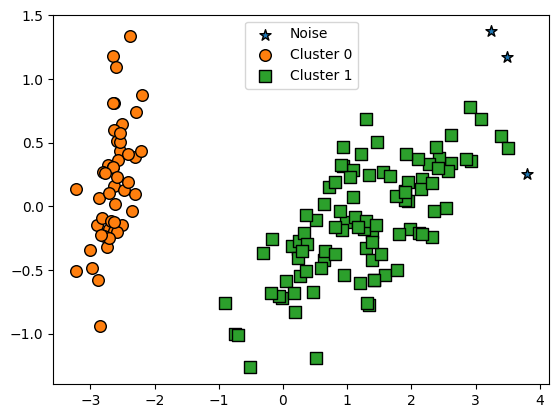

In [40]:
dbscan= DBSCAN(eps=0.6, min_samples=16, metric='euclidean')

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target']= iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

##DBSCAN 적용하기 - make_circles()데이터 세트

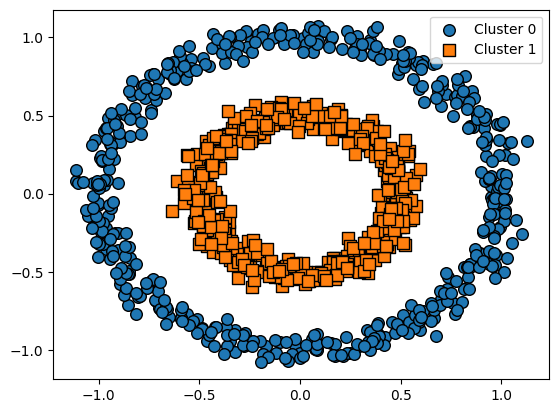

In [41]:
from sklearn.datasets import make_circles

X,y= make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)

clusterDF= pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

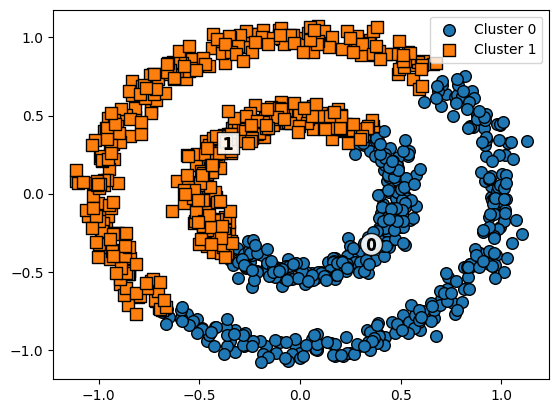

In [44]:
# KMeans로 make_circles() 데이터 세트를 군집화 수행

from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels= kmeans.fit_predict(X)
clusterDF['kmeans_cluster']= kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

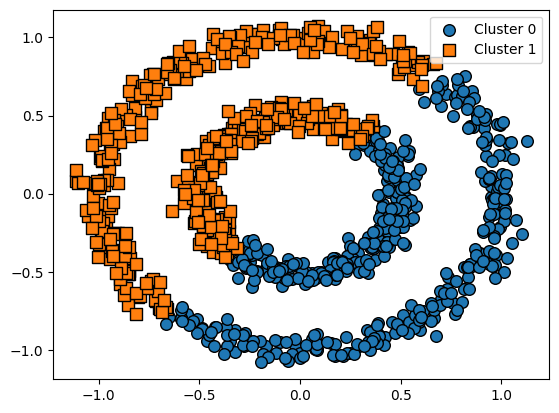

In [45]:
# GMM으로 make_circles()데이터 세트를 군집화 수행

from sklearn.mixture import BayesianGaussianMixture

gmm= GaussianMixture(n_components=2, random_state=0)
gmm_label= gmm.fit(X).predict(X)
clusterDF['gmm_cluster']= gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

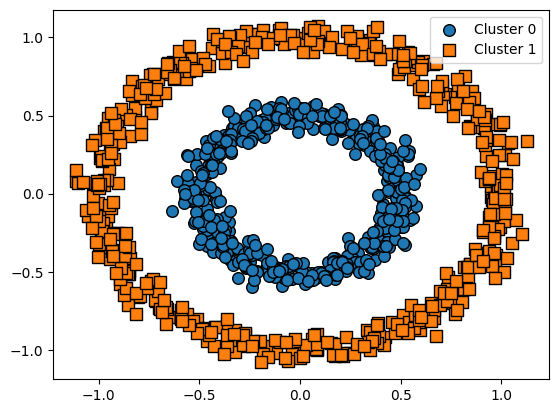

In [46]:
# DBSCAN으로 make_circles() 데이터세트 군집화 수행

from sklearn.cluster import DBSCAN

dbscan= DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels= dbscan.fit_predict(X)
clusterDF['dbscan_cluster']= dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

#**06. 군집화 실습 - 고객 세그먼테이션**

##데이터 세트 로딩과 데이터 클렌징

In [49]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df= pd.read_excel(io='Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [50]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


사전 정제 작업이 필요
<br>
- NUll 데이터 제거: CustomerID가 Null인 데이터가 많음. 고객 세그먼테이션을 수행하므로 고객 식별번호가 없는 데이터는 필요 없기에 삭제

- 오류 데이터 삭제: Quantity 또는 UnitPrice가 0보다 적은 경우(반환을 뜻하는 값)<br>
분석의 효율성을 위해 삭제

In [51]:
retail_df= retail_df[retail_df['Quantity']>0]
retail_df= retail_df[retail_df['UnitPrice']>0]
retail_df= retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [52]:
retail_df['Country'].value_counts()[:5]

,count
Country,
United Kingdom,354321
Germany,9040
France,8341
EIRE,7236
Spain,2484


In [53]:
# 영국이 대다수를 차지하므로 다른 국가의 데이터는 모두 제외

retail_df= retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


*최종 데이터가 354,321건으로 줄음

##RFM 기반 데이터 가공

In [54]:
retail_df['sale_amount']= retail_df['Quantity']*retail_df['UnitPrice']
retail_df['CustomerID']= retail_df['CustomerID'].astype(int)

In [57]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['InvoiceNo'].count().sort_values(ascending=False)[:5])

CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: count, dtype: int64
CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: InvoiceNo, dtype: int64


In [58]:
retail_df.groupby('CustomerID')['InvoiceNo'].count().mean()

90.38801020408164

현재 수행: 고객 레벨로 주문 기간, 주문 횟수, 주문 금액 데이터를 기반으로 세그먼테이션 수행
<br>
데이터 변경: 주문번호+상품코드 기준의 데이터로 변경

<br>
-> 이를 위해 주문번호 기준의 데이터를 개별 고객 기준의 데이터로 Group by

In [61]:
# DataFrame의 groupby()의 multiple 연산을 위해 agg()이용
# Recency는 Invoicedata 칼럼의 max()에서 데이터 가공
# Frequency는 IncoiceNo 칼럼의 count(), Monetary value는 sale_amount 칼럼의 sum()

aggregations= {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount': 'sum'
}

cust_df= retail_df.groupby('CustomerID').agg(aggregations)

# groupby된 결과 칼럼 값을 recency, frequency, monetary로 변경
cust_df= cust_df.rename(columns={'InvoiceDate': 'Recency',
                                 'InvoiceNo': 'Frequency',
                                 'sale_amount': 'Monetary'})

cust_df= cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


recency 칼럼의 데이터 값 특성으로 인해 데이터 가공이 추가적으로 필요<br>
: 가장 최근의 주문 일자를 뺀 데이터에서 일자 데이터(days)만 추출해 생성

In [62]:
import datetime as dt

cust_df['Recency']= dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency']= cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 칼럼 건수는', cust_df.shape)
cust_df.head(3)

cust_df 로우와 칼럼 건수는 (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


RFM 분석에 필요한 Recency, Frequency, Monetary 칼럼을 모두 생성했으니, RFM 데이터 세트의 특성을 개괄적으로 알아보고 RFM 기반에서 고객 세그먼테이션 수행

## RFM 기반 고객 세그먼테이션

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <BarContainer object of 10 artists>)

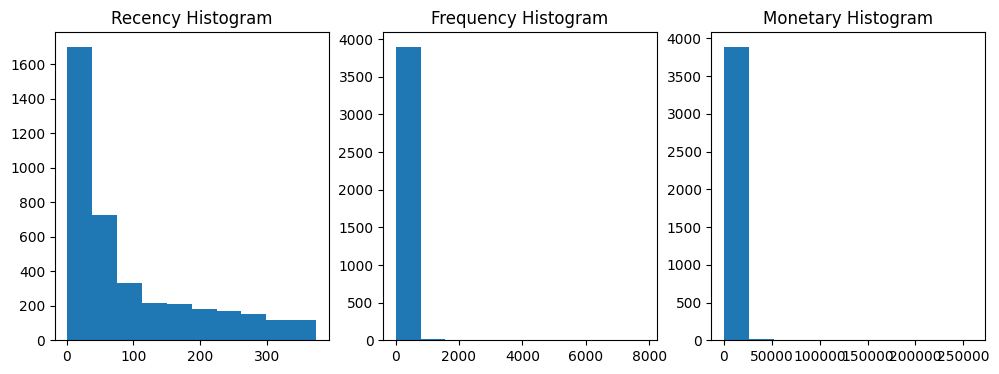

In [63]:
# 왜곡된 데이터 분포도에서 군집화를 수행할 때 발생하는 현상 알아보기

fig,(ax1, ax2, ax3)= plt.subplots(figsize=(12,4), ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

Frequency, Monetary의 경우 특정 범위에 값이 몰려 있어 왜곡 정도가 심함

In [64]:
# 각 칼럼의 데이터 값 백분위로 대략적으로 어떻게 값이 분포돼 있는지 확인

cust_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [66]:
# 데이터 세트를 StandardScaler로 평균과 표준편차를 재조정한 뒤에 K-평균 수행

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features= cust_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled= StandardScaler().fit_transform(X_features)

kmeans= KMeans(n_clusters=3, random_state=0)
labels= kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label']= labels

print('실루엣 스코어는: {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는: 0.576


In [71]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

def visualize_kmeans_plot_multi(range_n_clusters, X):
    """
    Visualizes KMeans cluster plots for a range of cluster numbers.

    Args:
        range_n_clusters: List of cluster numbers to evaluate.
        X: Feature data for clustering.
    """
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title('Number of Cluster : '+ str(n_clusters)+'\n' \
                              'Silhouette Score :' + str(round(silhouette_avg,3)))
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

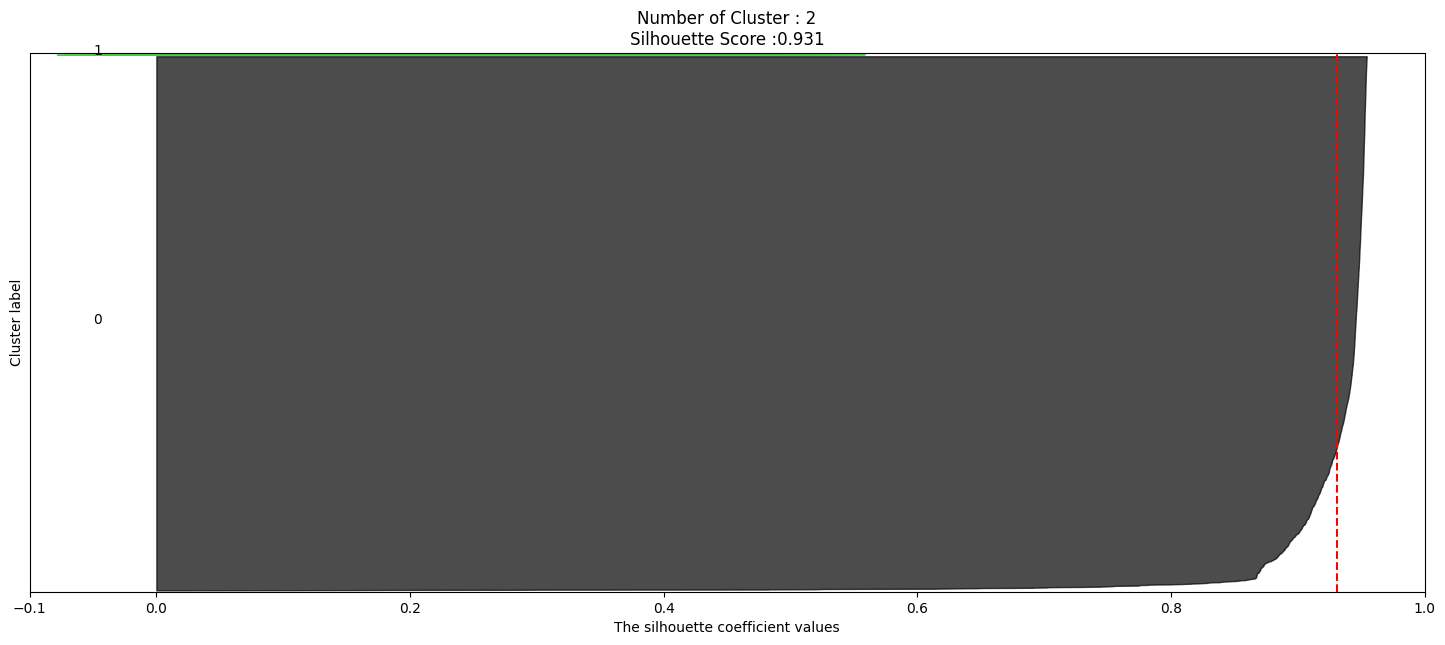

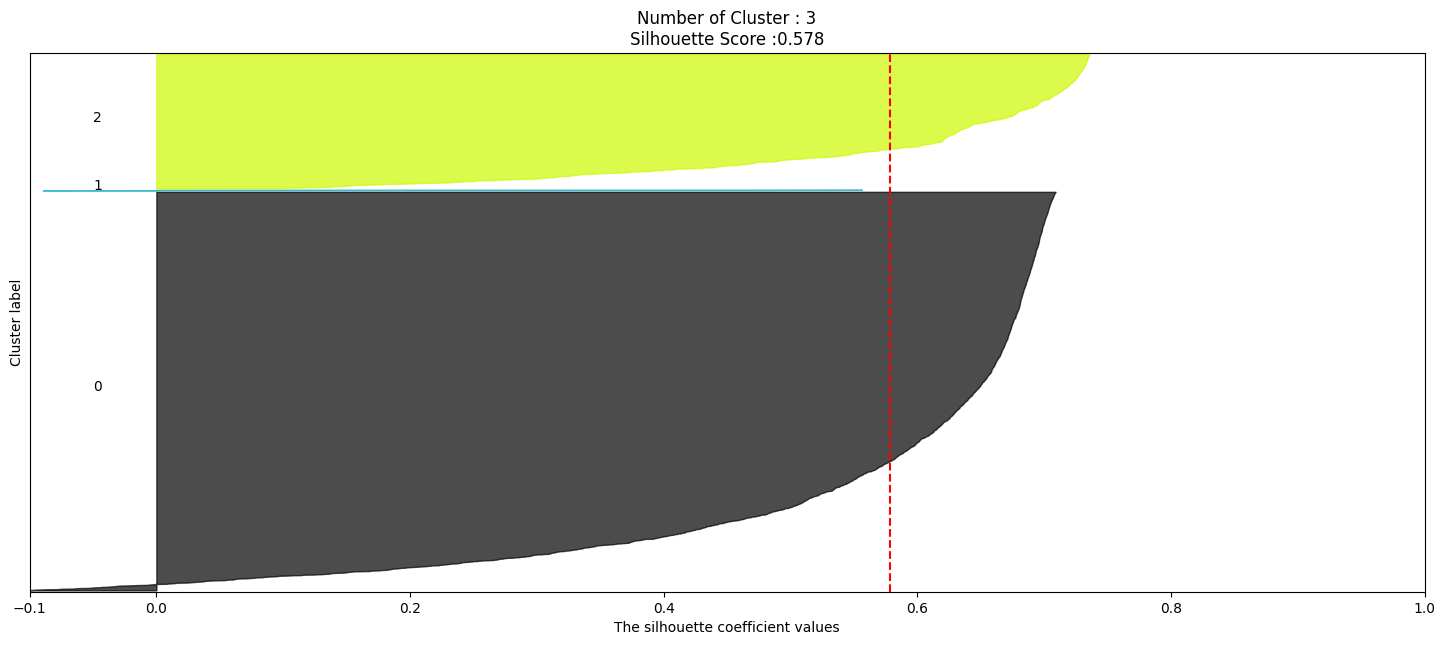

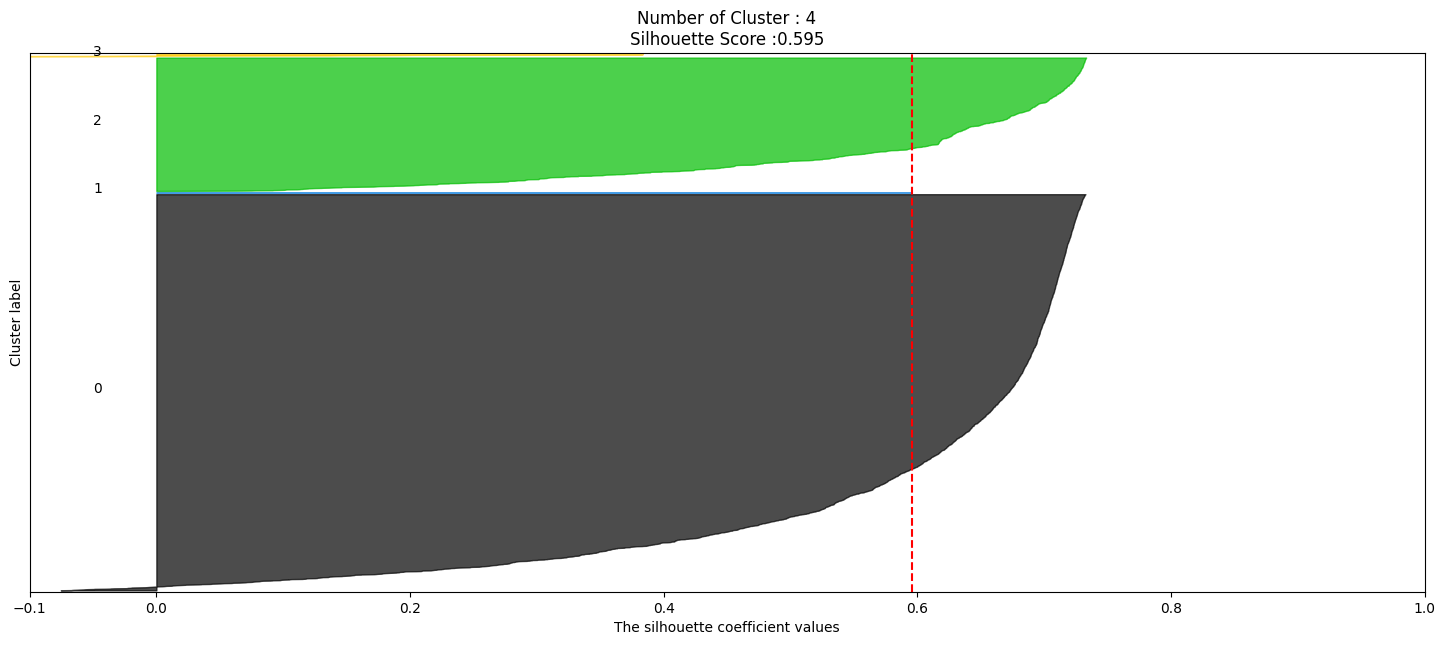

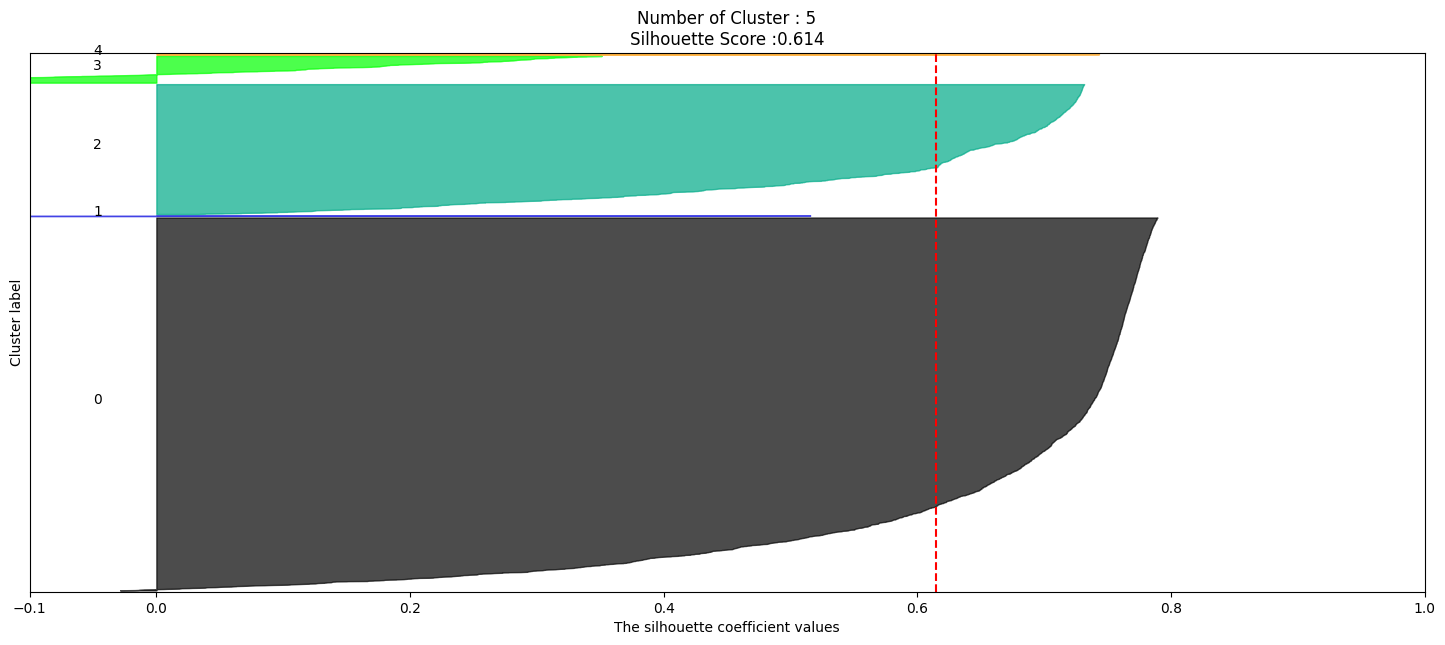

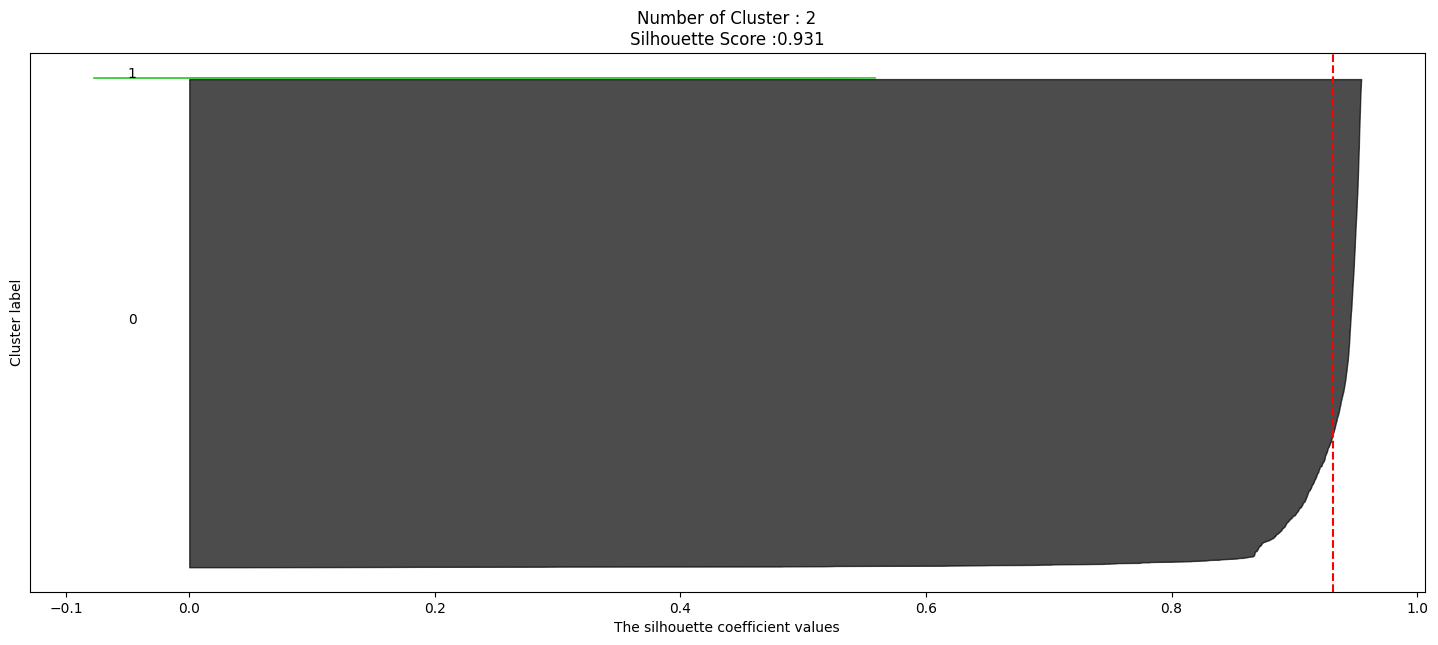

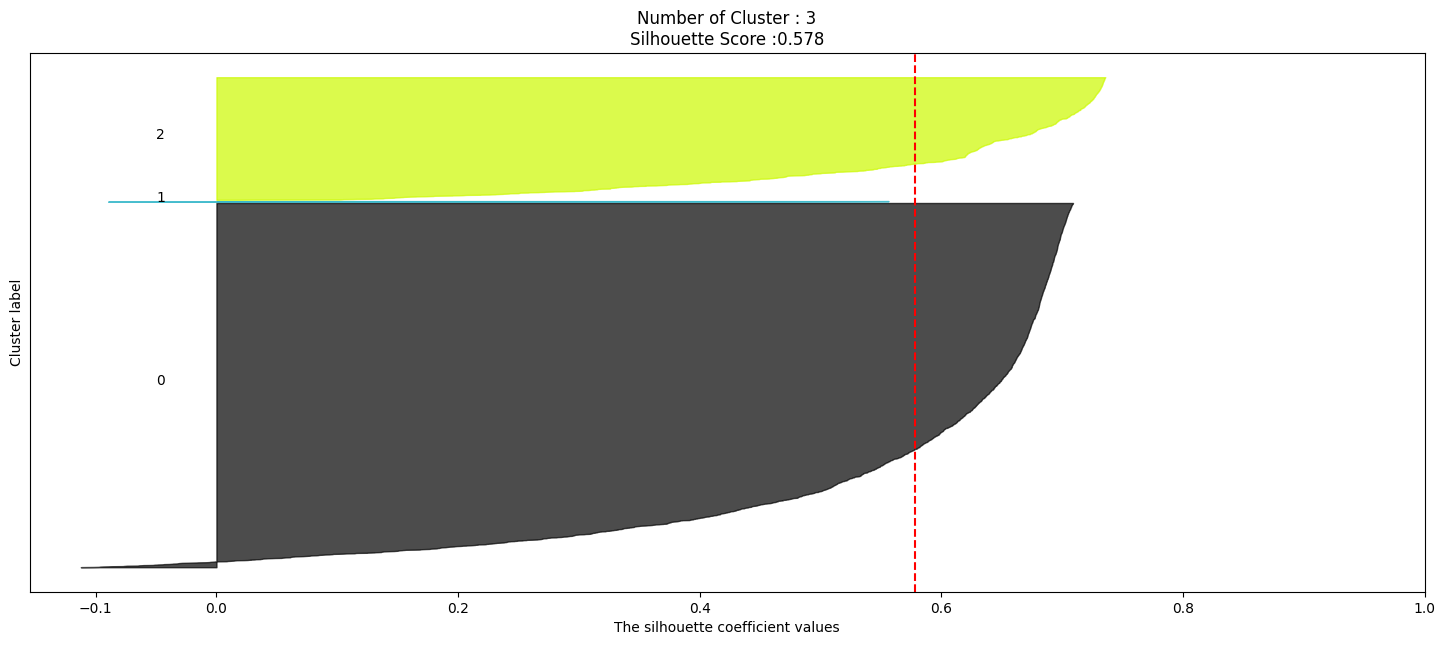

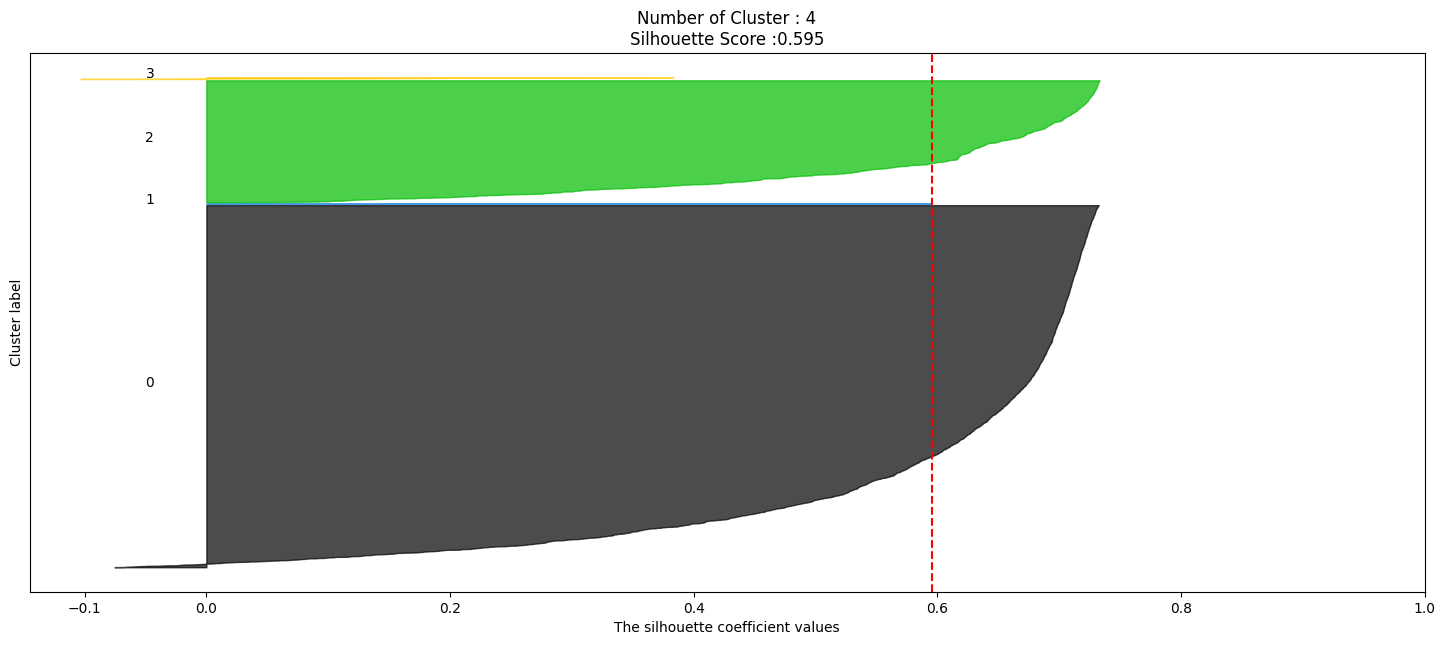

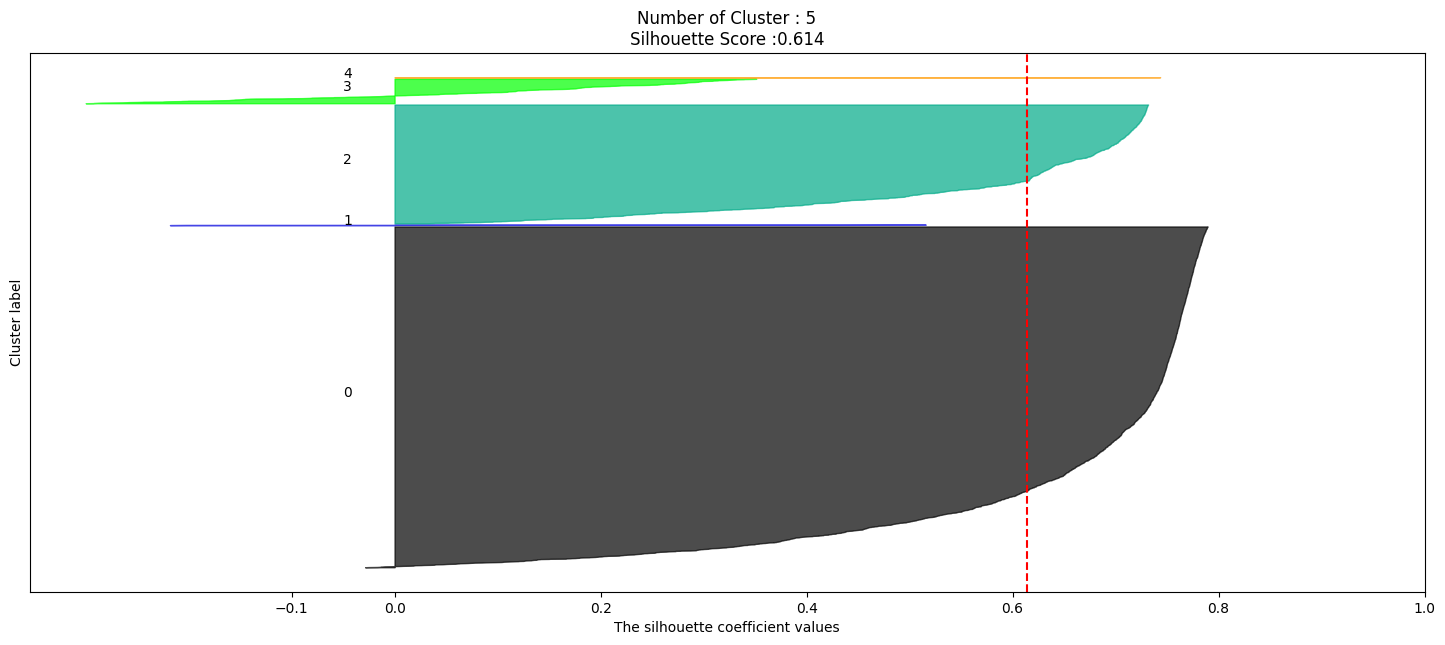

In [72]:
visualize_silhouette([2,3,4,5], X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5], X_features_scaled)

지나치게 왜곡된 데이터 세트는 K-평균과 같은 거리 기반 군집화 알고리즘에서 지나치게 일반적인 군집화 결과 도출

In [74]:
# 데이터 세트의 왜곡 정도를 낮추기 위해 전체 데이터를 로그변환한 뒤에 K-평균 알고리즘 적

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# 각 칼럼에 np.log1p()로 Log Transformation
cust_df['Recency_log']= np.log1p(cust_df['Recency'])
cust_df['Frequency_log']= np.log1p(cust_df['Frequency'])
cust_df['Monetary_log']= np.log1p(cust_df['Monetary'])

# 로그 변환 데이터에 StandardScaler 적용
X_features= cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']].values
X_features_scaled= StandardScaler().fit_transform(X_features)

kmeans= KMeans(n_clusters=3, random_state=0)
labels= kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label']= labels

print('실루엣 스코어는: {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는: 0.303
